<a href="https://colab.research.google.com/github/Saul-Ochoa/Natural-language-processing/blob/main/Natural%20Language%20Processing%20with%20Disaster%20Tweets/Natural_languajes_procesing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Natural languajes procesing**

In [2]:
pip install pyspellchecker

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 42.9 MB/s eta 0:00:00


In [3]:
import nltk
import pandas as pd
import numpy as np
import re
import string
import matplotlib.pyplot as plt
import seaborn as sns
from collections import defaultdict
from spellchecker import SpellChecker
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
from keras.models import Sequential
from keras.layers import Embedding,LSTM,Dense,SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from keras.initializers import Constant
from sklearn.model_selection import train_test_split
from keras.optimizers import Adam
from keras.utils import plot_model
import warnings
warnings.filterwarnings('ignore')

In [4]:
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [5]:
# stop words
stop_words=stopwords.words('spanish')
print(stop_words)

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [6]:
texto='Hola ¿Como estas?, si todo bien que te pasa  mongolo'
texto=texto.lower()
tokens=word_tokenize(texto)
print(tokens)
print(f'Numero de tokens: {len(tokens)}')

['hola', '¿como', 'estas', '?', ',', 'si', 'todo', 'bien', 'que', 'te', 'pasa', 'mongolo']
Numero de tokens: 12


In [7]:
# Tokenizar el texto
tokens = word_tokenize(texto)

# Eliminar las stopwords
tokens_filtrados = [word for word in tokens if word.lower() not in stop_words]

print("Tokens originales:", tokens)
print(f'Numero de tokens: {len(tokens)}')
print("Tokens filtrados:", tokens_filtrados)
print("Número de tokens filtrados", len(tokens_filtrados))

Tokens originales: ['hola', '¿como', 'estas', '?', ',', 'si', 'todo', 'bien', 'que', 'te', 'pasa', 'mongolo']
Numero de tokens: 12
Tokens filtrados: ['hola', '¿como', '?', ',', 'si', 'bien', 'pasa', 'mongolo']
Número de tokens filtrados 8


In [8]:
stemmer=SnowballStemmer('spanish')
# palabras de ejemplo
palabras=["corriendo", "corrió", "corren", "corre"]
# Aplicar el stemming a cada palabra
stems = [stemmer.stem(palabra) for palabra in palabras]
print(stems)

['corr', 'corr', 'corr', 'corr']


In [9]:
pip install spacy -q

In [10]:
!python -m spacy download es_core_news_sm -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 24.2 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


* Tokenización: Dividir un texto en palabras (tokens).
* Lematización: Obtener la forma base (lema) de una palabra.
* Etiquetado gramatical: Determinar la categoría gramatical (verbo, sustantivo, adjetivo, etc.).
* Reconocimiento de entidades nombradas (NER): Identificar nombres de personas, lugares, organizaciones, fechas, etc.
* Análisis sintáctico: Ver cómo las palabras se relacionan en una oración.

In [11]:
import spacy
nlp=spacy.load('es_core_news_sm')
doc=nlp('caminar caminando caminó')
for token in doc:
  print(token.text, "---", token.lemma_)

caminar --- caminar
caminando --- caminar
caminó --- caminar


In [12]:
# Texto de ejemplo
texto = "Apple es una empresa de tecnología fundada por Steve Jobs en California."
doc = nlp(texto)
# Tokenización (imprimir las palabras individuales)
print("Tokenización")
for token in doc:
    print(token.text)
# Lametización (imprimir el lema de cada palabra)
print("\nLematización:")
for token in doc:
    print(token.text, "-->", token.lemma_)
# Etiquetado gramatical
print("\nEtiquetado gramatical:")
for token in doc:
    print(token.text, "-->", token.pos_)
# Reconocimiento de entidades nombradas
print("\nReconocimiento de entidades nombradas:")
for ent in doc.ents:
    print(ent.text, "-->", ent.label_)

Tokenización
Apple
es
una
empresa
de
tecnología
fundada
por
Steve
Jobs
en
California
.

Lematización:
Apple --> Apple
es --> ser
una --> uno
empresa --> empresa
de --> de
tecnología --> tecnología
fundada --> fundado
por --> por
Steve --> Steve
Jobs --> Jobs
en --> en
California --> California
. --> .

Etiquetado gramatical:
Apple --> PROPN
es --> AUX
una --> DET
empresa --> NOUN
de --> ADP
tecnología --> NOUN
fundada --> ADJ
por --> ADP
Steve --> PROPN
Jobs --> PROPN
en --> ADP
California --> PROPN
. --> PUNCT

Reconocimiento de entidades nombradas:
Apple --> ORG
Steve Jobs --> PER
California --> LOC


In [13]:
url_train='/content/drive/MyDrive/Natural-language-processing/train.csv'
url_test='/content/drive/MyDrive/Natural-language-processing/test (1).csv'
train=pd.read_csv(url_train)
test=pd.read_csv(url_test)

In [14]:
print(train.shape)
print(test.shape)

(7613, 5)
(3263, 4)


In [15]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [16]:
train.shape

(7613, 5)

In [17]:
train['target'].value_counts()

,count
target,
0,4342
1,3271


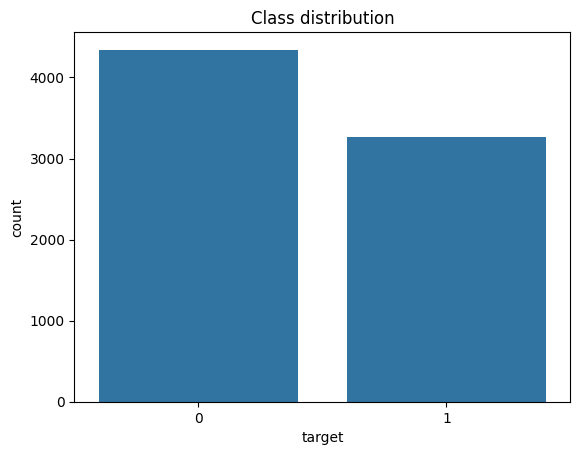

In [18]:
# class distribution
sns.countplot(data=train,x='target')
plt.title('Class distribution')
plt.show()

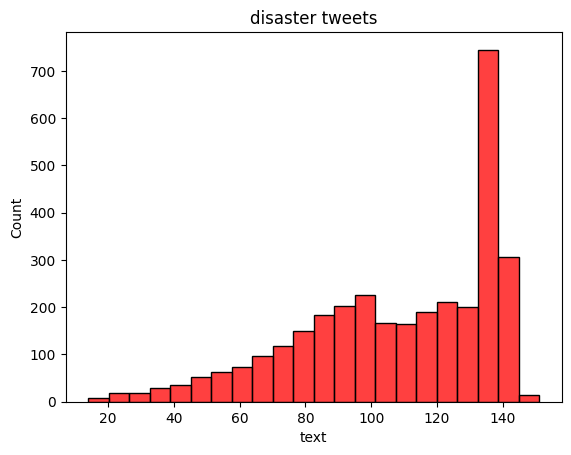

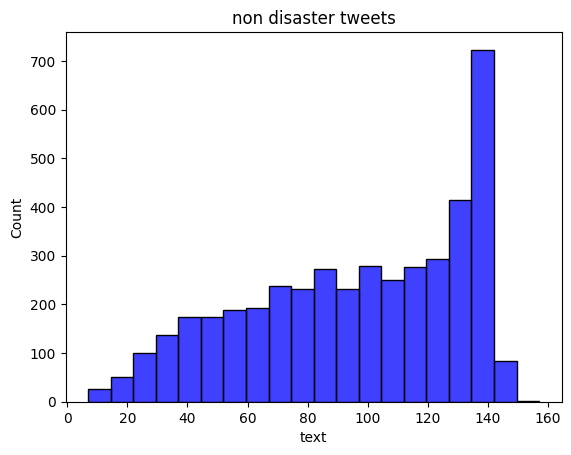

In [19]:
# Number of character in tweets
tween_len=train[train['target']==1]['text'].str.len()
sns.histplot(tween_len,color='red')
plt.title('disaster tweets')
plt.show()

tween_len_1=train[train['target']==0]['text'].str.len()
sns.histplot(tween_len_1,color='blue')
plt.title('non disaster tweets')
plt.show()

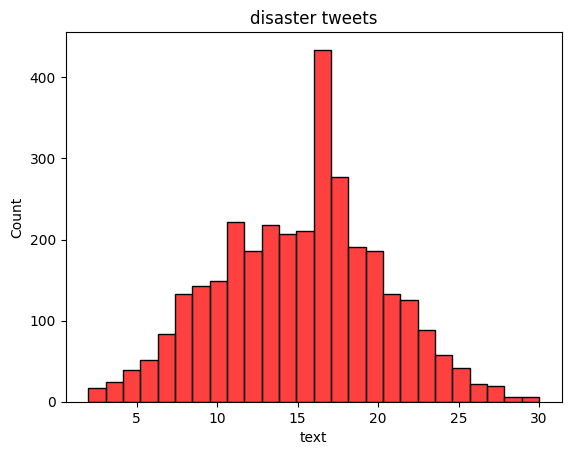

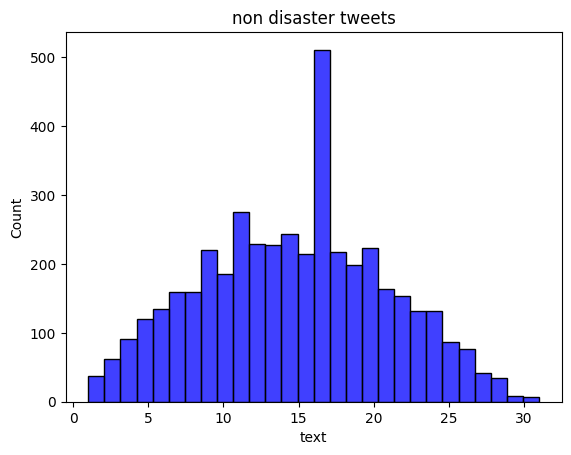

In [20]:
# Number of word in tweets
tweet_len=train[train['target']==1]['text'].str.split().map(lambda x: len(x))
sns.histplot(tweet_len,color='red')
plt.title('disaster tweets')
plt.show()


tweet_len_1=train[train['target']==0]['text'].str.split().map(lambda x: len(x))
sns.histplot(tweet_len_1,color='blue')
plt.title('non disaster tweets')
plt.show()

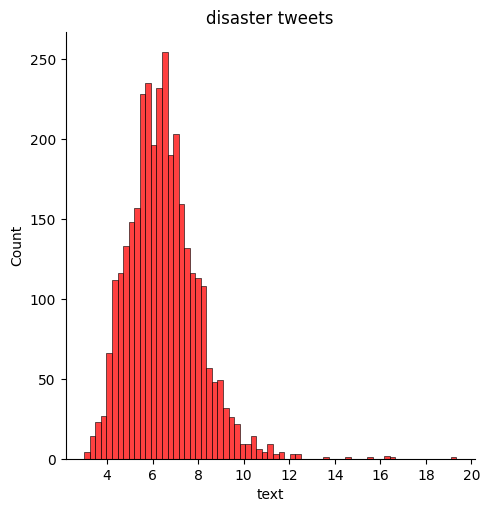

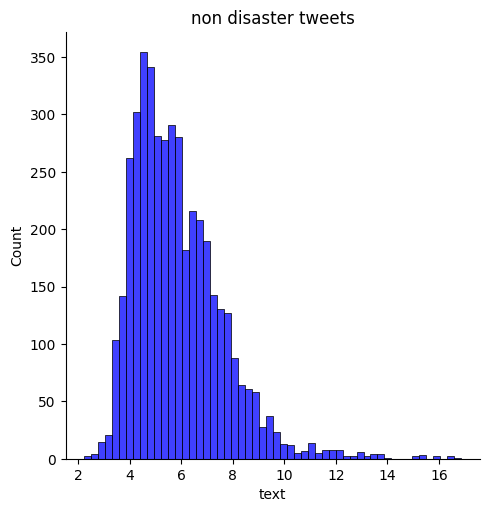

In [21]:
# Average word lenght in a tweet
word=train[train['target']==1]['text'].str.split().apply(lambda x: [len(i) for i in x])
word_1=train[train['target']==0]['text'].str.split().apply(lambda x: [len(i) for i in x])
sns.displot(word.map(lambda x: np.mean(x)),color='red')
plt.title('disaster tweets')
plt.show()

sns.displot(word_1.map(lambda x: np.mean(x)),color='blue')
plt.title('non disaster tweets')
plt.show()

In [22]:
# Count the stop words
def create_corpus(target):
    corpus=[]

    for x in train[train['target']==target]['text'].str.split():
        for i in x:
            corpus.append(i)
    return corpus

In [23]:
corpus=create_corpus(0)
corpus

["What's",
 'up',
 'man?',
 'I',
 'love',
 'fruits',
 'Summer',
 'is',
 'lovely',
 'My',
 'car',
 'is',
 'so',
 'fast',
 'What',
 'a',
 'goooooooaaaaaal!!!!!!',
 'this',
 'is',
 'ridiculous....',
 'London',
 'is',
 'cool',
 ';)',
 'Love',
 'skiing',
 'What',
 'a',
 'wonderful',
 'day!',
 'LOOOOOOL',
 'No',
 'way...I',
 "can't",
 'eat',
 'that',
 'shit',
 'Was',
 'in',
 'NYC',
 'last',
 'week!',
 'Love',
 'my',
 'girlfriend',
 'Cooool',
 ':)',
 'Do',
 'you',
 'like',
 'pasta?',
 'The',
 'end!',
 'We',
 'always',
 'try',
 'to',
 'bring',
 'the',
 'heavy.',
 '#metal',
 '#RT',
 'http://t.co/YAo1e0xngw',
 'Crying',
 'out',
 'for',
 'more!',
 'Set',
 'me',
 'ablaze',
 'On',
 'plus',
 'side',
 'LOOK',
 'AT',
 'THE',
 'SKY',
 'LAST',
 'NIGHT',
 'IT',
 'WAS',
 'ABLAZE',
 'http://t.co/qqsmshaJ3N',
 '@PhDSquares',
 '#mufc',
 "they've",
 'built',
 'so',
 'much',
 'hype',
 'around',
 'new',
 'acquisitions',
 'but',
 'I',
 'doubt',
 'they',
 'will',
 'set',
 'the',
 'EPL',
 'ablaze',
 'this',
 'seas

In [24]:
dic=defaultdict(int)
stop=set(stopwords.words('english'))
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]
top

[('the', 1524),
 ('a', 1115),
 ('to', 1099),
 ('and', 840),
 ('of', 834),
 ('in', 720),
 ('you', 529),
 ('is', 512),
 ('for', 452),
 ('my', 442)]

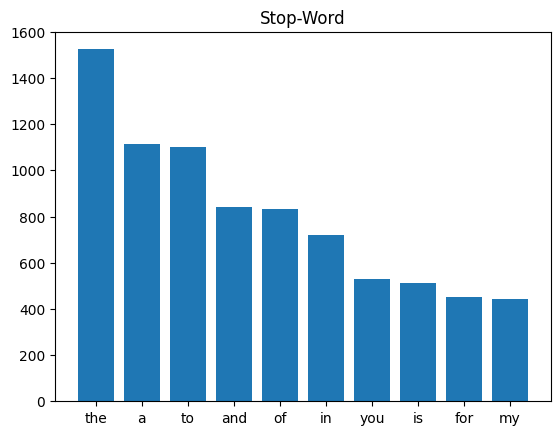

In [25]:
x,y=zip(*top)
plt.bar(x,y)
plt.title('Stop-Word')
plt.show()

<BarContainer object of 10 artists>

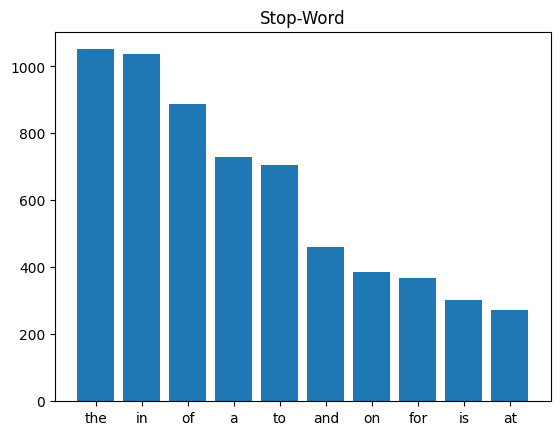

In [26]:
corpus=create_corpus(1)

dic=defaultdict(int)
for word in corpus:
    if word in stop:
        dic[word]+=1

top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10]



x,y=zip(*top)
plt.title('Stop-Word')
plt.bar(x,y)

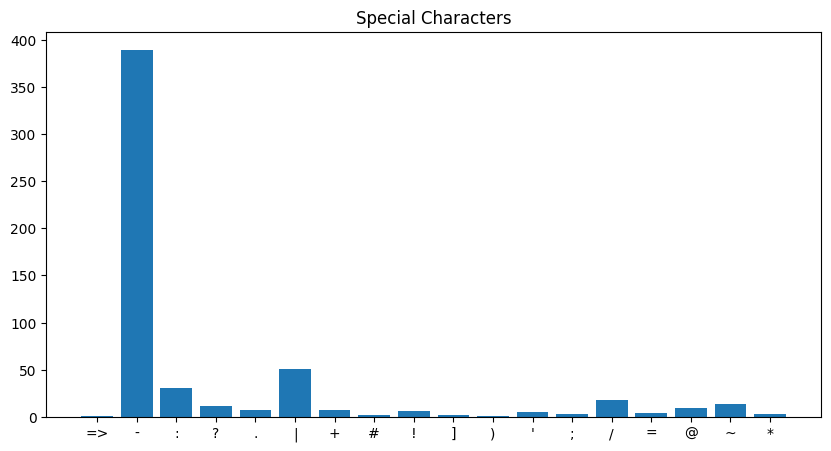

In [27]:
plt.figure(figsize=(10,5))
corpus=create_corpus(1)
dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1
x,y=zip(*dic.items())
plt.title('Special Characters')
plt.bar(x,y)
plt.show()

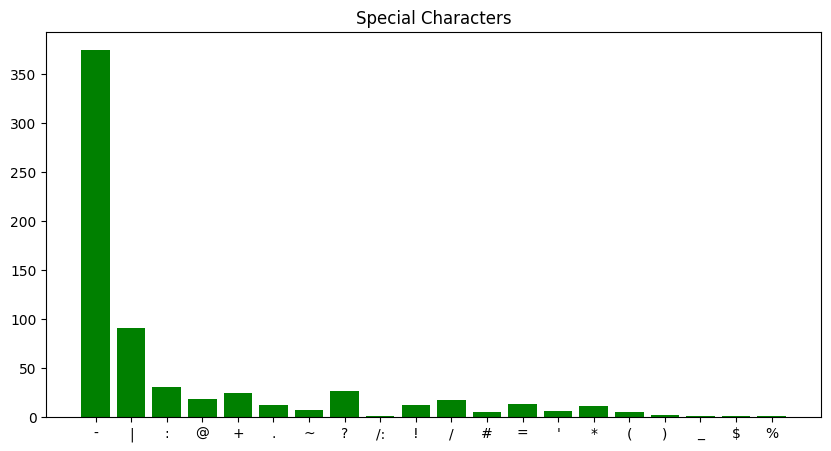

In [28]:
plt.figure(figsize=(10,5))
corpus=create_corpus(0)

dic=defaultdict(int)
import string
special = string.punctuation
for i in (corpus):
    if i in special:
        dic[i]+=1

x,y=zip(*dic.items())
plt.bar(x,y,color='green')
plt.title('Special Characters')
plt.show()

## **Data Cleaning**

In [29]:
df=pd.concat([train,test])
df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1.0
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1.0
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1.0
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1.0
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1.0


In [30]:
# Remove URL
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

df['text']=df['text'].apply(lambda x: remove_URL(x))


In [31]:
# Remove html
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)


df['text']=df['text'].apply(lambda x: remove_html(x))

In [32]:
# Remove emoji
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)



df['text']=df['text'].apply(lambda x: remove_emoji(x))

In [33]:
# Remove punctuations
def remove_punct(text):
    table=str.maketrans('','',string.punctuation)
    return text.translate(table)

df['text']=df['text'].apply(lambda x: remove_punct(x))

## **GloVe for Vectorization**

In [34]:
!wget http://nlp.stanford.edu/data/glove.6B.zip
!unzip glove.6B.zip

--2024-09-21 22:26:13--  http://nlp.stanford.edu/data/glove.6B.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:80... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://nlp.stanford.edu/data/glove.6B.zip [following]
--2024-09-21 22:26:13--  https://nlp.stanford.edu/data/glove.6B.zip
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip [following]
--2024-09-21 22:26:14--  https://downloads.cs.stanford.edu/nlp/data/glove.6B.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 862182613 (822M) [application/zip]
Saving to: ‘glove.6B.zip’

glov

In [35]:
from tqdm import tqdm
def create_corpus(df):
    corpus=[]
    for tweet in tqdm(df['text']):
        words=[word.lower() for word in word_tokenize(tweet) if((word.isalpha()==1) & (word not in stop))]
        corpus.append(words)
    return corpus

corpus=create_corpus(df)

100%|██████████| 10876/10876 [00:02<00:00, 4120.12it/s]


In [36]:
embedding_dict={}
with open('glove.6B.100d.txt', 'r') as f:
    for line in f:
        values=line.split()
        word=values[0]
        vectors=np.asarray(values[1:],'float32')
        embedding_dict[word]=vectors
f.close()

In [37]:
MAX_LEN=50
tokenizer_obj=Tokenizer()
tokenizer_obj.fit_on_texts(corpus)
sequences=tokenizer_obj.texts_to_sequences(corpus)

tweet_pad=pad_sequences(sequences,maxlen=MAX_LEN,truncating='post',padding='post')

In [38]:
# Number of unique words
word_index=tokenizer_obj.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 20342


In [39]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 20342/20342 [00:00<00:00, 357122.66it/s]


In [40]:
num_words=len(word_index)+1
embedding_matrix=np.zeros((num_words,100))

for word,i in tqdm(word_index.items()):
    if i > num_words:
        continue

    emb_vec=embedding_dict.get(word)
    if emb_vec is not None:
        embedding_matrix[i]=emb_vec

100%|██████████| 20342/20342 [00:00<00:00, 351508.20it/s]


## **Baseline Model**

In [41]:
model=Sequential()
embedding = Embedding(num_words, 100, embeddings_initializer=Constant(embedding_matrix),
                      input_length=MAX_LEN, trainable=False)
model.add(embedding)
model.add(SpatialDropout1D(0.2))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
optimizer = Adam(learning_rate=1e-5)
model.compile(loss='binary_crossentropy',optimizer=optimizer,metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ spatial_dropout1d (SpatialDropout1D) │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm (LSTM)                          │ ?                           │     0 (unbuilt) │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ ?                           │     0 (unbuilt) │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [43]:
df_train=tweet_pad[:train.shape[0]]
df_test=tweet_pad[train.shape[0]:]

In [44]:
X_train,X_test,y_train,y_test=train_test_split(df_train,train['target'].values,test_size=0.15)
print('Shape of train',X_train.shape)
print("Shape of Validation ",X_test.shape)

Shape of train (6471, 50)
Shape of Validation  (1142, 50)


In [46]:
history=model.fit(X_train,y_train,batch_size=4,epochs=15,validation_data=(X_test,y_test),verbose=2)

Epoch 1/15
1618/1618 - 44s - 27ms/step - accuracy: 0.5647 - loss: 0.6914 - val_accuracy: 0.5954 - val_loss: 0.6872
Epoch 2/15
1618/1618 - 38s - 23ms/step - accuracy: 0.6358 - loss: 0.6452 - val_accuracy: 0.7539 - val_loss: 0.5469
Epoch 3/15
1618/1618 - 44s - 27ms/step - accuracy: 0.7194 - loss: 0.5852 - val_accuracy: 0.7566 - val_loss: 0.5253
Epoch 4/15
1618/1618 - 37s - 23ms/step - accuracy: 0.7251 - loss: 0.5745 - val_accuracy: 0.7671 - val_loss: 0.5165
Epoch 5/15
1618/1618 - 40s - 25ms/step - accuracy: 0.7370 - loss: 0.5598 - val_accuracy: 0.7715 - val_loss: 0.5094
Epoch 6/15
1618/1618 - 39s - 24ms/step - accuracy: 0.7450 - loss: 0.5552 - val_accuracy: 0.7706 - val_loss: 0.5062
Epoch 7/15
1618/1618 - 33s - 20ms/step - accuracy: 0.7438 - loss: 0.5530 - val_accuracy: 0.7723 - val_loss: 0.5018
Epoch 8/15
1618/1618 - 43s - 26ms/step - accuracy: 0.7510 - loss: 0.5446 - val_accuracy: 0.7723 - val_loss: 0.4981
Epoch 9/15
1618/1618 - 36s - 22ms/step - accuracy: 0.7484 - loss: 0.5457 - val_a

## **Making our submission**

In [47]:
url_submission='/content/drive/MyDrive/Natural-language-processing/sample_submission.csv'
submission=pd.read_csv(url_submission)
submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


In [50]:
y_pre=model.predict(df_test)
y_pre=np.round(y_pre).astype(int).reshape(3263)
sub=pd.DataFrame({'id':submission['id'].values.tolist(),'target':y_pre})
sub.to_csv('submission.csv',index=False)

102/102 ━━━━━━━━━━━━━━━━━━━━ 4s 31ms/step


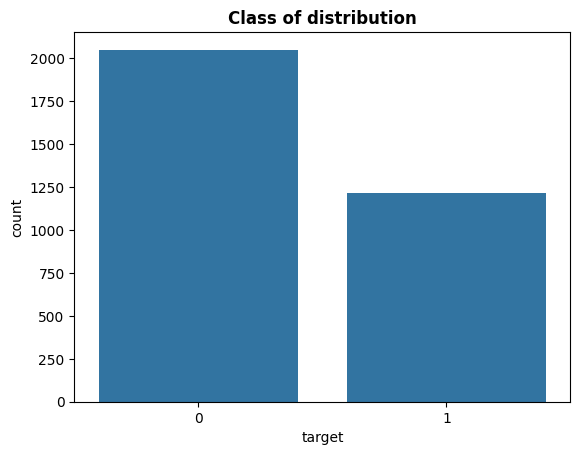

In [53]:
# Resumen final
sns.countplot(data=sub,x='target')
plt.title('Class of distribution',fontsize=12,weight='bold')
plt.show()